# Nalaganje osnovnih paketov
pandas: data analisys library


In [1]:
import pandas as pd

# Vhodni podatki in vizualizacija (Data understanding)


**Nalaganje dataset-a**

preverimo ali smo pravilno naložili dataset

In [2]:
!ls /kaggle/input/apple-quality

apple_quality.csv


Preberemo CSV datoteko in prikažemo prvih nekaj vrstic naloženega dataset-a. Ogled prvih nekaj vrstic ponuja začetni vpogled v stolpce in podatke.

raw_data ... podatki v Pandas DataFrame obliki

In [3]:
filename = "/kaggle/input/apple-quality/apple_quality.csv"
raw_data = pd.read_csv(filename)
raw_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


**Vizualizacija**

Ukaz *.info()* ponuja kratek povzetek DataFrame-a, ki prikazuje tipe stolpcev, število neničelnih vrednosti in splošno porabo pomnilnika. Iz rezultatov je očitno, da v mojih podatkih ničenih vrednosti ni.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Ukaz *.describe()* nam omogoča vpogled v osnovne statistične vrednosti naših podatkov. Spodaj pa so vrednosti podatkov predstavljene še v histogramih za lažjo vizualizacijo. Iz njiju je razvidna porazdelitev vrednosti podatkov in pa njihov razpon.

In [5]:
raw_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Sweetness'}>,
        <Axes: title={'center': 'Crunchiness'}>],
       [<Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>]], dtype=object)

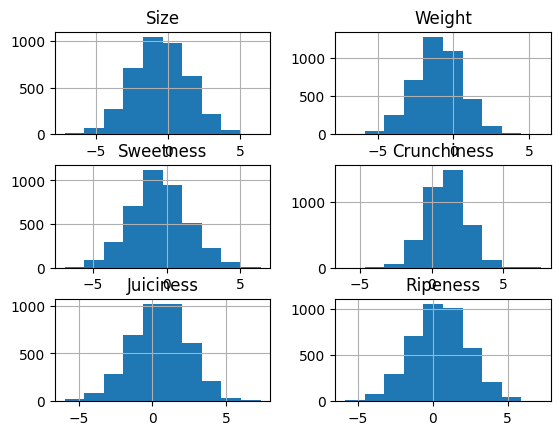

In [6]:
raw_data.drop(columns=["A_id"]).hist()

**Priprava podatkov**

Zaradi klasifikacijskih algoritmov, ki jih bom v nadaljevanju uporabila, je dobra odločitev, da odstranim stolpec "A-id". Oba algortima bi se lahko, če enolični identifikator pustim v podatkih, naučila predvidevat o končni kvalifikaciji z njegovo pomočjo, ki pa v resnici nima povezave na to ali je jabolko dobro ali ne.

In [7]:
data = raw_data.drop(columns=["A_id"])
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# Modeliranje

## Naive Bayes

Naive Bayes je nabor metod za nadzorovano učenje, ki temeljijo na Bayesovem izreku s predpostavko o pogojni neodvisnosti med parametri. </br>
Bayesov izrek:</br></br>
        P(Y∣X) = ( P(X∣Y) * P(Y) ) / P(X)</br></br>

Ker so moji podatki zvezni in iz zgornjih histogramov je razvidno da so v normalni porazdelitvi, sem se odločila za uporabo algoritma Gaussian Naive Bayes. 

Spodnja koda uvozi razreda train_test_split in GaussianNB iz knjižnice scikit-learn. Prvi nam omogoča deljenje podatkov v skupini za treniranje in testiranje. Slednji pa je klasifikacijski algoritem Gaussian Naive Bayes.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Spodnja koda loči ciljno spremenljivko (Quality) v Y in shrani preostale vrednosti v X. Model mora napovedati, ali je jabolko kakovostno ali ne, zato vrednost Quality ohranimo kot našo izhodno spremenljivko (Y). Preostale podatke uporabimo kot vhodne značilnosti (X) za učenje modela.

In [9]:
Y = data["Quality"]
X = data.drop(columns=["Quality"])

Y.head()

0    good
1    good
2     bad
3    good
4    good
Name: Quality, dtype: object

In [10]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


Koda razdeli vrednosti spremenljivk (X) in razreda (Y) v učno in testno skupino, tako da za testiranje uporabi 20% podatkov. Razdelitev podatkov zagotavlja, da imamo ločene nabore za učenje in ocenjevanje delovanja modela. Z nastavitvijo fiksnega random_state omogočimo ponovljivost razdelitve za dosledne rezultate pri vsakem ponavljanju.

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=12)

In [12]:
train_X.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000
mean,-0.502789,-0.984242,-0.489250,0.975399,0.543010,0.482416
std,1.919646,1.611408,1.932926,1.401255,1.936609,1.870028
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.823646,-2.017788,-1.755446,0.058341,-0.791251,-0.779425
50%,-0.494748,-0.983310,-0.525761,0.986936,0.592408,0.484312
75%,0.824782,0.056143,0.777472,1.886376,1.857716,1.745029
max,6.406367,5.790714,5.862356,7.619852,7.364403,7.237837


In [13]:
test_X.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,-0.503916,-1.010733,-0.395510,1.025730,0.388745,0.561624
std,1.962510,1.567266,1.984333,1.408898,1.901014,1.891742
min,-5.692093,-6.556685,-6.507847,-3.504206,-5.544053,-4.676170
25%,-1.794746,-1.950360,-1.696021,0.153045,-0.862523,-0.708611
50%,-0.601345,-0.993247,-0.444749,1.038374,0.358214,0.597073
75%,0.743123,-0.001955,0.864767,1.918979,1.699573,1.869721
max,5.866232,5.149000,6.374916,7.561485,6.252592,6.346445


### Treniranje